# Neural Network

## Theory

Input > Weight&Bias > Activation Function > Output

[Activation Function]
Perceptron 출력에 의미를 부여, 일반적으로 Non-linear Function

* Tanh(Hyperbolic Tangent) Function
* Sigmoid Function
: 하나의 입력을 0으로 강제한 2-Class Softmax Function과 동일 
* Softmax Function
: Multi-class Classification에 활용 (여러 경우의 수 중 한 가지에 속할 '확률'을 표현)
* ReLU Function
: 0보다 작은 값을 0으로 강제

[Loss Function]
최적화 이론에서 최소화 하고자 하는 함수로, 알고리즘이 아직 '얼마나 못 하는지'를 표현

* MSE(Mean Squared Error)
* MAE(Mean Absolute Error)
: 오차가 커져도 손실함수가 일정하게 증가, Outlier에 Robust함

* One-Hot Encoding
: 다중 클래스 분류 문제의 정답을 표기할 때 사용 - 정답에 해당하는 요소만 1로 표현
* 교차 엔트로피 오차(Cross Entropy Error, CEE)
: One-Hot Encoding의 정답인 클래스에 대해서만 오차를 계산

[NN Structure]

* Fully-Connected Layer(FCN)
: 두 계층 간의 모든 뉴런이 연결되어 있는 계층
* Shallow NN 
: Input, Hidden, Output Layer로 이뤄진 신경망 
 - DNN 등장 이전의 신경망을 통칭
 - 각 계층은 FCN
* DNN(Deep Neural Network)
: 5개 이상의 계층을 가진 NN

### Perceptron 구현 실습

In [4]:
import tensorflow as tf

In [7]:
import numpy as np

TensorFlow 2.0 으로 Perceptron 구현

In [8]:
class Perceptron:
    def __init__(self, w, b):
        self.w = tf.Variable(w, dtype = tf.float32)
        self.b = tf.Variable(b, dtype = tf.float32)
    
    def __call__(self, x):
        return tf.sign(tf.reduce_sum(self.w * x) + self.b)

In [9]:
# Utility Function 구현
def v(*args):
    return np.array(args)

Perceptron으로 OR Gate 구현

In [10]:
# Perceptron 정의
w = v(1, 1)
b = 0.5

perceptron = Perceptron(w, b)

In [11]:
# Perceptron 동작 확인
p1 = perceptron(v(1, 1)) # TT
p2 = perceptron(v(-1, 1)) # FT
p3 = perceptron(v(-1, -1)) # FF 
p4 = perceptron(v(1, -1)) # TF

print(p2.numpy(), p1.numpy())
print(p3.numpy(), p4.numpy())

1.0 1.0
-1.0 1.0


Perceptron을 조합해 XOR Gate 구현

In [12]:
# Perceptron 정의
p_nand = Perceptron(w = v(-1, -1), b = 0.5)
p_or = Perceptron(w = v(1, 1), b = 0.5)
p_and = Perceptron(w = v(1, 1), b = -0.5)

def xor(x):
    h1 = p_nand(x)
    h2 = p_or(x)
    return p_and(v(h1, h2))

In [13]:
# Perceptron 동작 확인

p1 = xor(v(1, 1)) # TT
p2 = xor(v(-1, 1)) # FT
p3 = xor(v(-1, -1)) # FF 
p4 = xor(v(1, -1)) # TF

print(p2.numpy(), p1.numpy())
print(p3.numpy(), p4.numpy())

1.0 -1.0
-1.0 1.0


## Optimization Algorithm

딥러닝 네트워크의 학습 
= Loss Function이 최소가 되게 하는 파라미터를 구하는 최적화 문제

[Gradient Descent]
 - 적절한 Learning Rate를 선택하는 것이 중요
 
 * Convex Function
 : 어디서 시작하더라도 경사하강법으로 최적 값에 도달
 * Non-convex Function
 : 시작 위치에 다라 다른 최적 값
  - Local Minimum 에 빠질 위험 있음
  
 * Saddle Point
 :기울기가 0이 되지만 극값이 아닌 지점
  - 경사하강법은 안장점에서 벗어날 수 없음

[Advanced Optimization Algorithm]

* Momentum
: 이동 벡터를 이용해 이전 기울기에 영향을 받는 알고리즘
 - Local Minimum 과 Noise에 대처할 수 있음
 
* AdaGrad(Adaptive Gradient, 적응적 기울기)
: 변수별로 Learning Rate가 달라지게 조절하는 알고리즘 
 - 학습이 많이 된 변수는 Learning Rate를 감소시킴
 - 학습이 반복되면 더 이상 학습되지 않음

* RMSProp
: AdaGrad의 문제점 개선, 합 대신 지수평균 사용
 - 변수 간 상대적 학습율 차이는 유지하면서, 오래 학습 가능
 
* Adam(Adaptive Moment Estimation)
: RMSProp, Momentum의 장점 결합

### Matplotlib

In [15]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

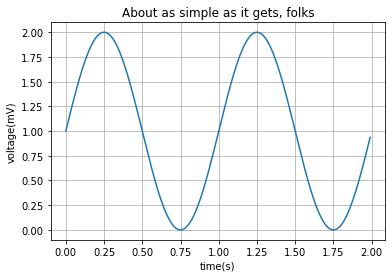

In [17]:
#기본 구성 요소_Data for Plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel = "time(s)", ylabel = "voltage(mV)", title = "About as simple as it gets, folks")
ax.grid()

fig.savefig("test.png")

Text(0, 0.5, 'Undamped')

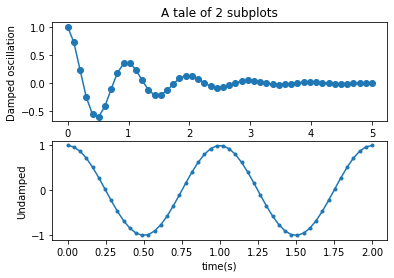

In [18]:
#여러 개의 그림 동시에 그리기
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)
plt.plot(x1, y1, "o-")
plt.title("A tale of 2 subplots")
plt.ylabel("Damped oscillation")

plt.subplot(2, 1, 2)
plt.plot(x2, y2, ".-")
plt.xlabel("time(s)")
plt.ylabel("Undamped")

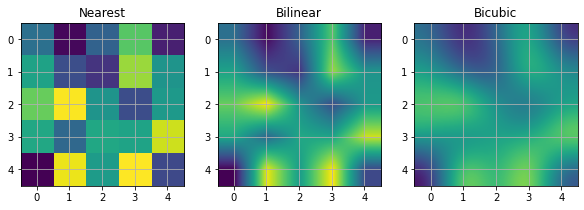

In [19]:
#행렬 그리기
A = np.random.rand(5, 5)

fig, axs = plt.subplots(1, 3, figsize = (10, 3))
for ax, interp in zip(axs, ["nearest", "bilinear", "bicubic"]):
  ax.imshow(A, interpolation = interp)
  ax.set_title(interp.capitalize())
  ax.grid(True)

#보통 Nearest를 이용하며, 학습된 필터를 확인하는 데 유용

In [21]:
#3차원 상의 표면 그리기
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

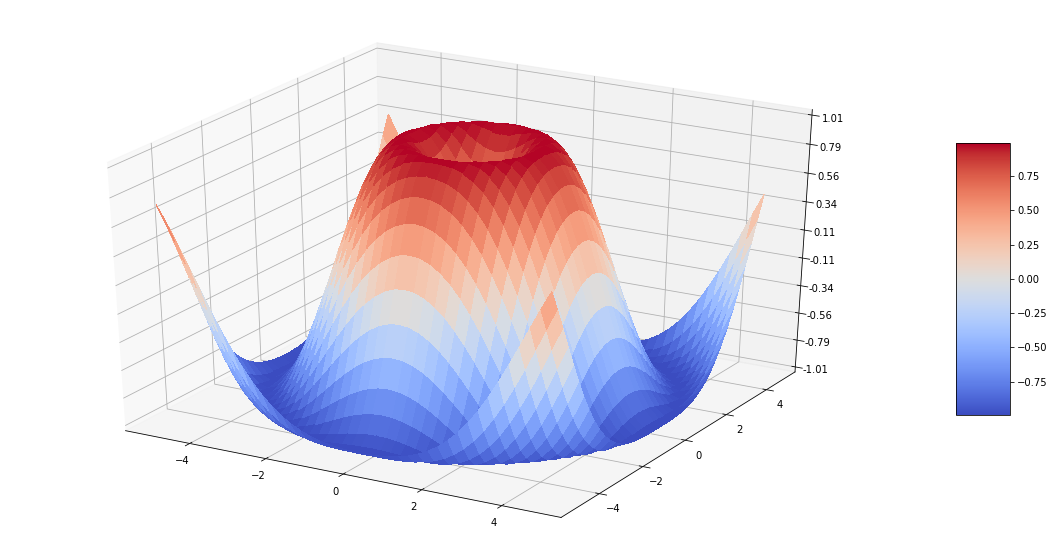

In [25]:
fig = plt.figure(figsize = (20, 10))
ax = fig.gca(projection = "3d")

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X ** 2 + Y ** 2)
Z = np.sin(R)

#Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap = cm.coolwarm, linewidth = 0, antialiased = False)

#Customize the z axis
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))

#Add a color bar which maps values to colors
fig.colorbar(surf, shrink = 0.5, aspect = 5)

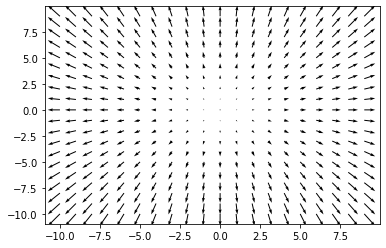

In [28]:
#화살표(Quiver) 표현하기

X = np.arange(-10, 10, 1)
Y = np.arange(-10, 10, 1)
U, V = np.meshgrid(X, Y)

fig, ax = plt.subplots()
q = ax.quiver(X, Y, U, V)
ax.quiverkey(q, X = 0.3, Y = 1.1, U = 10, label = "Quiver key, length = 10", labelpos = "E")

### Gradient Descent 구현 실습

In [29]:
#Define Loss Function 
def f(x):
  return 0.1 * x ** 4 - 1.5 * x ** 3 + 0.6 * x ** 2 + 1.0 * x + 20.0

In [30]:
#Define Loss Function's Differentiation
def df_dx(x):
  return 0.4 * x ** 3 - 4.5 * x ** 2 + 1.2 * x + 1.0

In [31]:
#Define HyperParameter
x = 5
eps = 1e-5
lr = 0.01
max_epoch = 1000

In [32]:
#Gradient Descent Algorithm 구현
min_x = x
min_y = f(min_x)

for _ in range(max_epoch):
  grad = df_dx(x)
  new_x = x - lr * grad
  y = f(new_x)

  if min_y > y:
    min_x = new_x
    min_y = y

  if np.abs(x - new_x) < eps:
    break

  x = new_x

In [33]:
print(min_x, min_y)

10.955323272631201 -428.84677390087836


### 알고리즘 결과 Visualization

In [40]:
#위 Algorithm 구현 실습에 이어서
#사용자 정의 함수로 작성
def gradient_descent(initial_x, learning_rate = 0.01, eps = 1e-5, max_epoch = 1000):
  x = initial_x

  x_log = [x]

  min_x = x
  min_y = f(min_x)

  for _ in range(max_epoch):
    grad = df_dx(x)
    new_x = x - lr * grad
    y = f(new_x)

    x_log.append(new_x)

    if min_y > y:
      min_x = new_x
      min_y = y

    if np.abs(x - new_x) < eps:
      break

  x = new_x
  return min_x, min_y, x_log

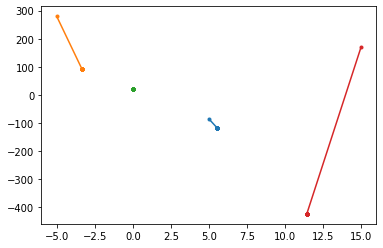

In [46]:
min_x1, min_y1, x_log1 = gradient_descent(initial_x = 5)
min_x2, min_y2, x_log2 = gradient_descent(initial_x = -5)
min_x3, min_y3, x_log3 = gradient_descent(initial_x = 0)
min_x4, min_y4, x_log4 = gradient_descent(initial_x = 15)

y_log1 = f(np.array(x_log1))
y_log2 = f(np.array(x_log2))
y_log3 = f(np.array(x_log3))
y_log4 = f(np.array(x_log4))

plt.plot(x_log1, y_log1, ".-")
plt.plot(x_log2, y_log2, ".-")
plt.plot(x_log3, y_log3, ".-")
plt.plot(x_log4, y_log4, ".-")